Use pivot tables to summarize data in a dataset

In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
df=pd.read_csv(r"/content/Iris.csv")
df.shape

(150, 6)

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
df['Species'].value_counts()/len(df['Species'])

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64

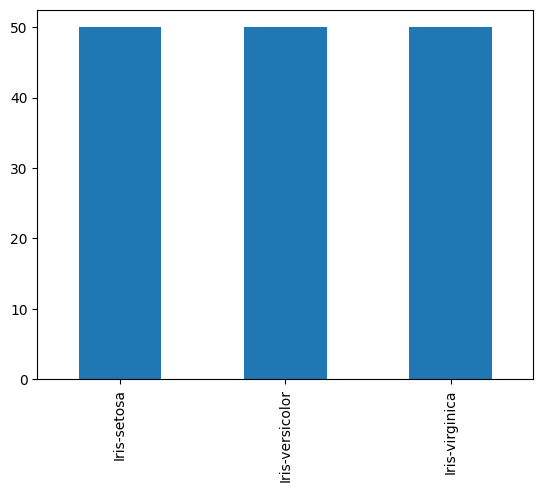

In [ ]:
df['Species'].value_counts().plot.bar()
plt.show()

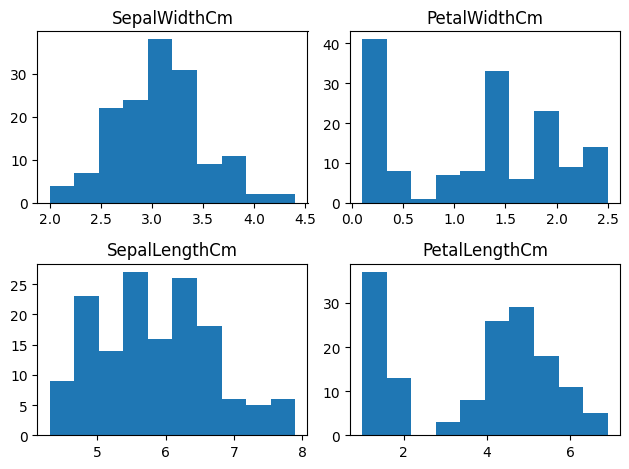

In [ ]:
plt.subplot(2,2,1)
plt.hist(df.SepalWidthCm)
plt.title('SepalWidthCm')

plt.subplot(2,2,2)
plt.hist(df.PetalWidthCm)
plt.title('PetalWidthCm')

plt.subplot(2,2,3)
plt.hist(df.SepalLengthCm)
plt.title('SepalLengthCm')

plt.subplot(2,2,4)
plt.hist(df.PetalLengthCm)
plt.title('PetalLengthCm')
plt.tight_layout()
plt.show()

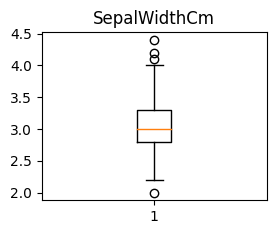

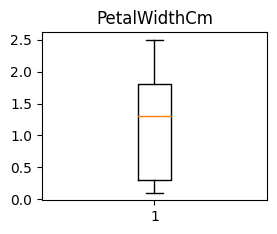

In [ ]:
plt.subplot(2,2,1)
plt.boxplot(df.SepalWidthCm)
plt.title('SepalWidthCm')
plt.show()

plt.subplot(2,2,2)
plt.boxplot(df.PetalWidthCm)
plt.title('PetalWidthCm')
plt.show()

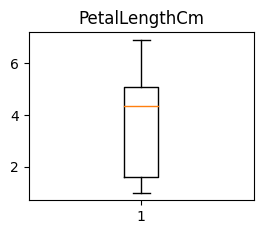

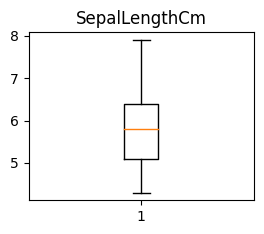

In [ ]:
plt.subplot(2,2,3)
plt.boxplot(df.PetalLengthCm)
plt.title('PetalLengthCm')
plt.show()

plt.subplot(2,2,2)
plt.boxplot(df.SepalLengthCm)
plt.title('SepalLengthCm')
plt.show()

In [ ]:
outliers=[]
def detect_outliers(data):
  threshold=3
  mean=np.mean(data)
  std=np.std(data)
  for x in data:
    z_score=(x-mean)/std
    if np.abs(z_score)>threshold:
      outliers.append(x)
      return outliers

In [ ]:
outliers = detect_outliers(df['SepalWidthCm'])

In [ ]:
df.sort_values(by='SepalWidthCm',inplace = True)

In [ ]:
q1 = np.percentile(df['SepalWidthCm'],25)
print(q1)

2.8


In [ ]:
q3=np.percentile(df['SepalWidthCm'],75)
print(q3)

3.3


In [ ]:
iqr=q3-q1
print(iqr)

0.5


In [ ]:
lower_fence=q1-(1.5*iqr)
upper_fence=q3+(1.5*iqr)
print(lower_fence,upper_fence)

2.05 4.05


<Axes: xlabel='SepalWidthCm'>

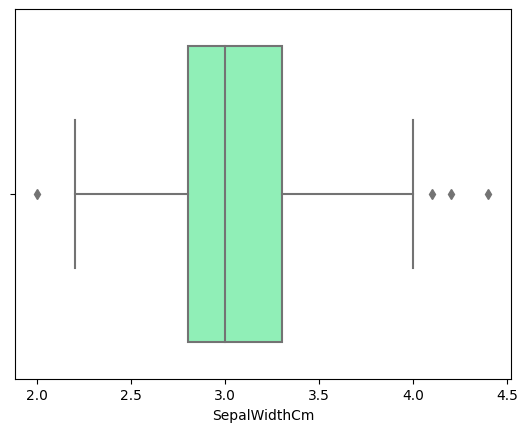

In [ ]:
sns.boxplot(x=df['SepalWidthCm'],palette = 'rainbow')

In [ ]:
df.loc[df['SepalWidthCm']<2.05,'SepalWidthCm']= np.mean(df['SepalWidthCm'])
df.loc[df['SepalWidthCm']>4.05,'SepalWidthCm']= np.mean(df['SepalWidthCm'])

Text(0.5, 1.0, 'SepalWidthCm')

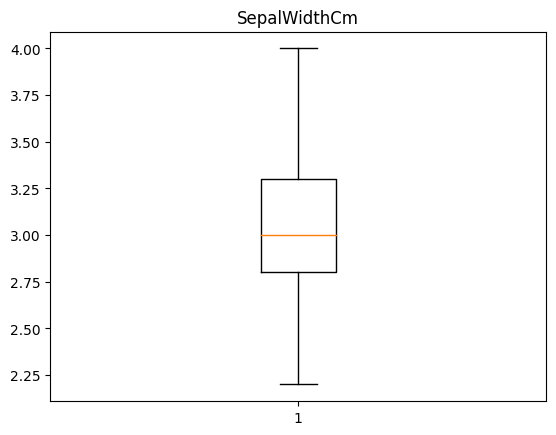

In [ ]:
plt.boxplot(df.SepalWidthCm)
plt.title('SepalWidthCm')